In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:/Users/Asus/Downloads/Divar.csv",low_memory=False,encoding='utf-8-sig')

In [5]:
data

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,residential-sell,apartment-sell,kermanshah,NaN,2024-07-01 00:00:00,مشاور املاک,~~~مشاورین املاک قبادی~~~\n■جنوبی تک واحدی\n■د...,آپارتمان ۱۸۰ متری وحدت غربی,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.350235,47.083241,500.0
999996,999996,residential-rent,apartment-rent,tehran,darya,2024-07-01 00:00:00,مشاور املاک,نوساز \n\n تک واحدی\n\nشخصی ساز\n\nروف گا...,آپارتمان ۱۱۰ متری سعادت آباد دریا,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.770454,51.369099,500.0
999997,999997,residential-sell,house-villa-sell,yazd,NaN,2024-11-01 00:00:00,NaN,سلام ودرود\nفروش منزل مسکونی واقع در خیابان ان...,منزل فروشی. خیابان انقلاب نرسیده به کارخانه...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,999998,temporary-rent,suite-apartment,bandar-anzali,NaN,2024-09-01 00:00:00,NaN,سویت بدون خواب (روبه دریا و معمولی)\nسویت ۱خوا...,مجتمع ویلایی کنار ساحل پاسداران,NaN,...,NaN,5.0,5.0,NaN,3000000.0,NaN,NaN,37.483501,49.438721,NaN


# Q4

In [7]:
dis1 = data.groupby('cat3_slug').agg({'price_value':'sum'}).reset_index()
dis1

,cat3_slug,price_value
0,apartment-rent,4.060200e+09
1,apartment-sell,4.701211e+15
2,house-villa-rent,1.211111e+06
3,house-villa-sell,1.873402e+15
4,industry-agriculture-business-rent,2.826722e+09
5,industry-agriculture-business-sell,1.684440e+14
6,office-rent,1.569603e+09
7,office-sell,1.133531e+14
8,partnership,8.041111e+10
9,plot-old,2.464506e+15


In [9]:
import math 
dis1.price_value = dis1.price_value.apply(lambda x: math.log10(x))

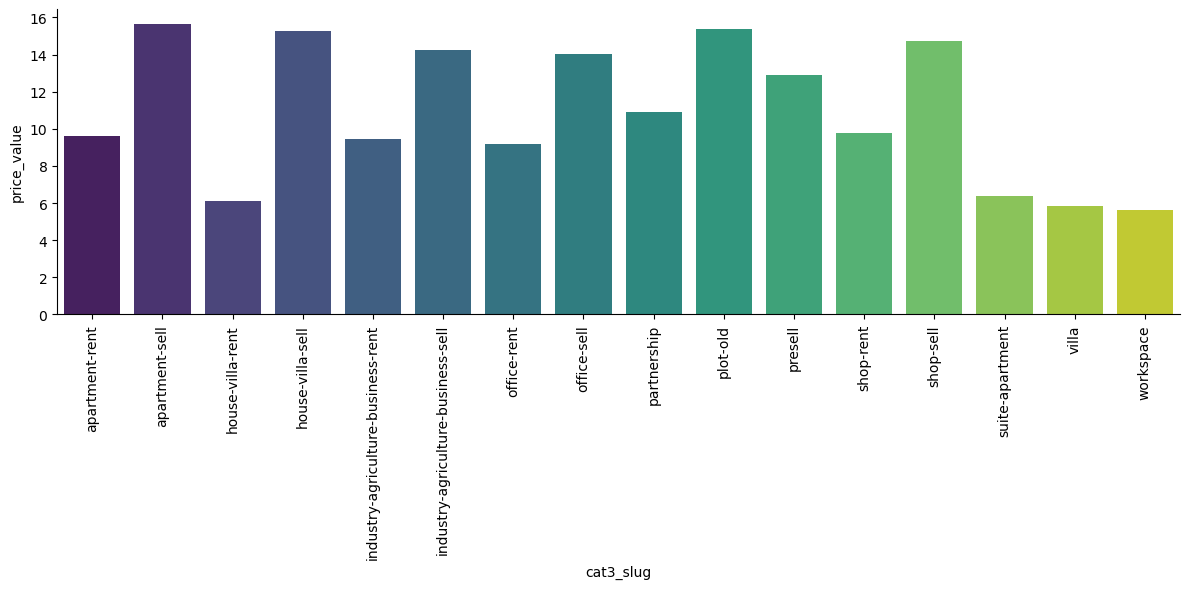

In [10]:
sns.catplot(dis1,x='cat3_slug',y='price_value',kind='bar',height=6,aspect=2,palette= 'viridis',hue='cat3_slug')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Q5

In [16]:
import folium
from folium.plugins import HeatMap
import numpy as np

# مختصات تهران 
latitude = 35.6892
longitude = 51.3890

# ایجاد نقشه پایه
map = folium.Map(location=[latitude, longitude], zoom_start=5)
data2 = data[(data['location_latitude'].notna()) & (data['location_longitude'].notna())]

# داده‌های مختصات
heat_data = data2[['location_latitude', 'location_longitude']].values.tolist()

# heatmap
HeatMap(heat_data,
        radius=15,          # شعاع نقاط
        blur=20,            # محوشدگی
        gradient={
        0.2: 'blue',   # تراکم کم
        0.4: 'lime',   # تراکم متوسط
        1: 'red'     # تراکم بالا
       },
        min_opacity=0.4    # حداقل شفافیت
        ).add_to(map)

map.save('heatmap.html')

# Q6

In [18]:
from jdatetime import datetime as jdt
df = pd.to_datetime(data['created_at_month'])
df2= df.apply(lambda x: jdt.fromgregorian(date=x).month)
df2 = pd.DataFrame(df2).rename({'created_at_month':'shamsi'},axis=1)
data2 = data.copy()
data2 = pd.concat([df2,data2],axis=1)
data2

,shamsi,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,5,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,2,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,7,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,4,999995,residential-sell,apartment-sell,kermanshah,NaN,2024-07-01 00:00:00,مشاور املاک,~~~مشاورین املاک قبادی~~~\n■جنوبی تک واحدی\n■د...,آپارتمان ۱۸۰ متری وحدت غربی,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.350235,47.083241,500.0
999996,4,999996,residential-rent,apartment-rent,tehran,darya,2024-07-01 00:00:00,مشاور املاک,نوساز \n\n تک واحدی\n\nشخصی ساز\n\nروف گا...,آپارتمان ۱۱۰ متری سعادت آباد دریا,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.770454,51.369099,500.0
999997,8,999997,residential-sell,house-villa-sell,yazd,NaN,2024-11-01 00:00:00,NaN,سلام ودرود\nفروش منزل مسکونی واقع در خیابان ان...,منزل فروشی. خیابان انقلاب نرسیده به کارخانه...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,6,999998,temporary-rent,suite-apartment,bandar-anzali,NaN,2024-09-01 00:00:00,NaN,سویت بدون خواب (روبه دریا و معمولی)\nسویت ۱خوا...,مجتمع ویلایی کنار ساحل پاسداران,...,NaN,5.0,5.0,NaN,3000000.0,NaN,NaN,37.483501,49.438721,NaN


In [20]:
df3 = data2.groupby('shamsi').agg({'rent_value':'mean'}).reset_index()
df3

,shamsi,rent_value
0,1,2.964253e+07
1,2,1.793537e+10
2,3,2.132662e+10
3,4,2.076351e+10
4,5,4.196970e+10
5,6,5.012166e+10
6,7,7.633000e+10
7,8,4.586934e+10
8,9,5.343412e+10
9,10,3.014109e+07


In [21]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display

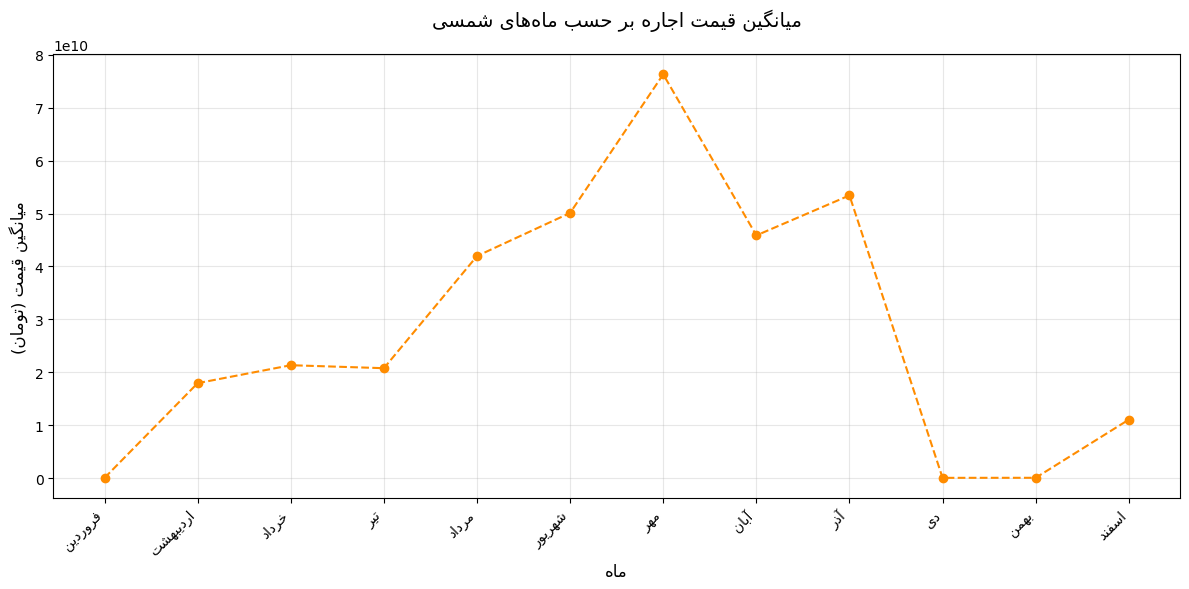

In [25]:
import matplotlib as mpl

month = ['فروردین','اردیبهشت','خرداد','تیر','مرداد','شهریور','مهر','آبان','آذر','دی','بهمن','اسفند'
]
months = []
for i in month:
    months.append(get_display(reshape(i)))
# تنظیمات نمودار
plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'  
plt.rcParams['axes.unicode_minus'] = False
plt.plot(months, df3.rent_value, marker='o', linestyle='--', color='darkorange')
plt.title(get_display(reshape('میانگین قیمت اجاره بر حسب ماه‌های شمسی')), fontsize=14, pad=20)
plt.xlabel(get_display(reshape('ماه')), fontsize=12)
plt.ylabel(get_display(reshape('میانگین قیمت (تومان)')), fontsize=12)
plt.grid(True, alpha=0.3)

#  جلوگیری از همپوشانی و نمایش  نمودار
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()